In [2]:
import datetime

import numpy as np
from matplotlib import cm, pyplot as plt
from matplotlib.dates import YearLocator, MonthLocator
import pandas as pd
from hmmlearn.hmm import GaussianHMM

In [5]:
df = pd.read_csv('results/prediction/genfactor.csv', index_col=0)

In [28]:
# Pack diff and volume for training.
X = df.fillna(0).values.T

###############################################################################
# Run Gaussian HMM
print("fitting to HMM and decoding ...", end="")

# Make an HMM instance and execute fit
model = GaussianHMM(n_components=4, covariance_type="diag", n_iter=1000).fit(X)

# Predict the optimal sequence of internal hidden state
hidden_states = model.predict(X)

print("done")

fitting to HMM and decoding ...

done


Transition matrix
[[9.67496116e-01 1.90877461e-03 3.05951092e-02 0.00000000e+00]
 [2.64883327e-71 9.61310571e-01 3.47816625e-02 3.90776654e-03]
 [6.83816603e-03 3.17269009e-03 9.89989144e-01 0.00000000e+00]
 [0.00000000e+00 2.00000000e-01 0.00000000e+00 8.00000000e-01]]

Means and vars of each hidden state
0th hidden state

1th hidden state

2th hidden state

3th hidden state



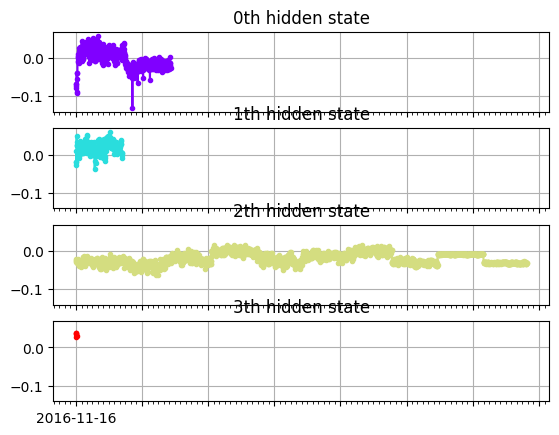

In [29]:
print("Transition matrix")
print(model.transmat_)
print()

print("Means and vars of each hidden state")
for i in range(model.n_components):
    print("{0}th hidden state".format(i))
    # print("mean = ", model.means_[i])
    # print("var = ", np.diag(model.covars_[i]))
    print()

fig, axs = plt.subplots(model.n_components, sharex=True, sharey=True)
colours = cm.rainbow(np.linspace(0, 1, model.n_components))
for i, (ax, colour) in enumerate(zip(axs, colours)):
    # Use fancy indexing to plot data in each state.
    mask = hidden_states == i
    ax.plot_date(df.columns.values[mask], df.mean(axis=0)[mask], ".-", c=colour)
    ax.set_title("{0}th hidden state".format(i))

    # Format the ticks.
    ax.xaxis.set_major_locator(YearLocator())
    ax.xaxis.set_minor_locator(MonthLocator())

    ax.grid(True)

plt.show()

In [30]:

to_plot = pd.DataFrame({'state': hidden_states, 'value': df.mean(axis=0)}, index=df.columns)

<AxesSubplot:>

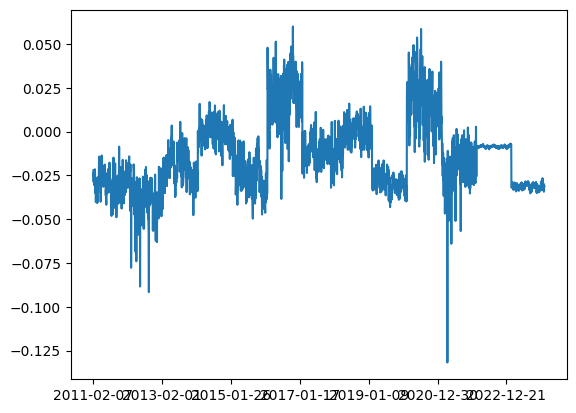

In [32]:
df.mean(axis=0).plot()

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

to_plot = pd.DataFrame({'state': hidden_states, 'value': df.mean(axis=0)}, index=df.columns)

plt.figure(figsize=(14, 7))
palette = plt.get_cmap('tab10')  # Get a colormap from Matplotlib

# Plot each segment with color based on its state
last_state = df.iloc[0]['state']
start_date = df.index[0]

for i in range(1, len(df)):
    current_state = df.iloc[i]['state']
    if current_state != last_state or i == len(df) - 1:
        end_date = df.index[i]
        plt.plot(df[start_date:end_date].index, df[start_date:end_date]['value'], color=palette(int(last_state)))
        start_date = df.index[i]
    last_state = current_state

# Highlighting the GFC period specifically (optional)
plt.axvspan(pd.to_datetime("2007-12"), pd.to_datetime("2009-06"), color='red', alpha=0.3, label='GFC')

plt.title('Time Series with Regime Switching (GFC Highlighted)')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()
plt.show()
